# Quik Draw

## What is QuickDraw?
Pictionary is a game where one person draws a shape or picture of an object in the air, and another has to guess it. Just like Pictionary, Quickdraw is a game where you draw a pattern in front of the camera and let computer guess it what you have drawn.

The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!.
The drawings were captured as timestamped vectors, tagged with metadata including what the player was asked to draw and in which country the player was located.

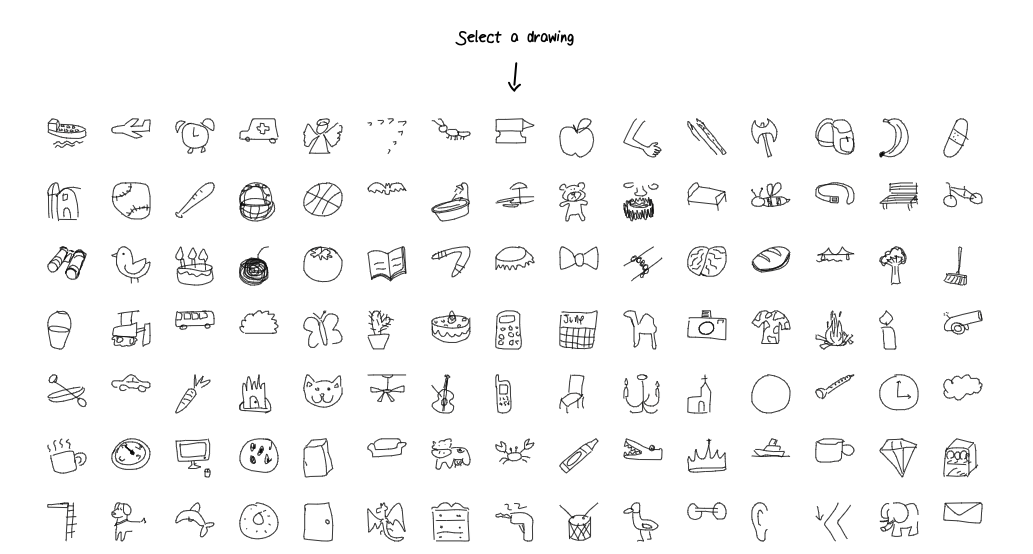

### let Start by importing requied libraries 

In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [ ]:
## following line is used to download text file containing 100 classes.
## for learning we will use 4 or 5 classes.
# !wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

# Reading and Writing to text files in Python

Python provides inbuilt functions for creating, writing and reading files.

Text files:
In this type of file, Each line of text is terminated with a special character called EOL (End of Line), which is the new line character (‘\n’) in python by default.

## File Access Modes

- __Read Only (‘r’)__ : Open text file for reading.
- __Read and Write (‘r+’)__ : Open the file for reading and writing.
- __Write Only (‘w’)__ : Open the file for writing.
- __Write and Read (‘w+’)__ : Open the file for reading and writing.
- __Append Only (‘a’)__ : Open the file for writing.
- __Append and Read (‘a+’)__ : Open the file for reading and writing.


# _File_object = open(r"File_Name","Access_Mode")_

## Reading from a file

__readlines()__ : Reads all the lines and return them as each line a string element in a list.

#  _File_object.readlines()_

## closing a file

close() function closes the file and frees the memory space acquired by that file. It is used at the time when the file is no longer needed or if it is to be opened in a different file mode.

# _File_object.close()_



In [ ]:
# delcare f = File_object and read "mini_classes.txt" in read mode.
## code here

# read classes in txt file 
## code here

# close the file 
## code here

# print classes
print(classes)

__Now we will download the selected classes from base url__

In [ ]:
# download function
# stores downloaded data in "data/" folder

import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    if(c !='\n'):
        c = c.rstrip()
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [ ]:
# run this cell for downloading .npy files 
## call download function 

In [ ]:
# current working directories
root = os.getcwd()
print(root)

### __The original QuickDraw data is formatted as ndjson files where each line contains a JSON object like the following:__

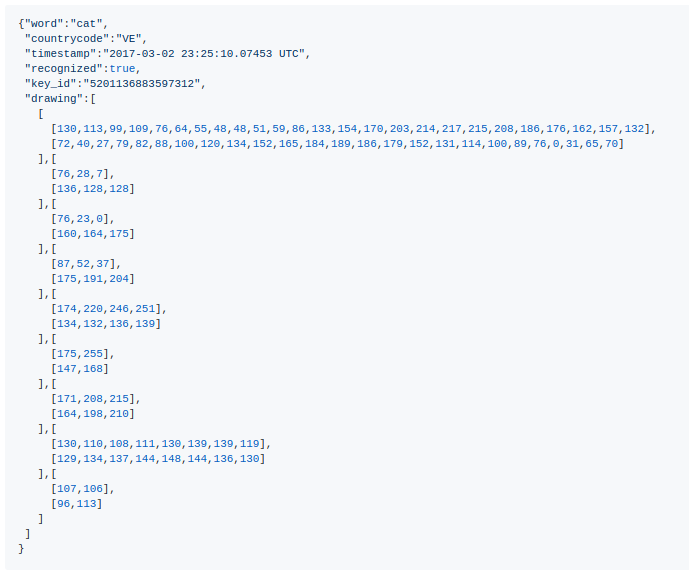

In [ ]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28
print(num_classes)

In [ ]:
print(len(x_train), len(y_test), len(y_train), len(x_test), class_names)

# visualiztion of data using matplotlib
we know that matplotlib is awesome for generating graphs and figures.The first thing we are going to do is import our matplotlib package. Then we’re going to import the image sub-package of matplotlib, pyplot.

our data is in numpy array, we can visualize data in with

we can reshape ndarray with

## _ndarray.reshape(x,y)_
reshape to (28,28) i.e is image size

## _plt.imshow(ndarray)_


In [ ]:
import matplotlib.pyplot as plt
from random import randint
# %matplotlib inline  
idx = randint(0, len(x_train))

# imshow ndarray
## code here show image

print(class_names[int(y_train[idx].item())])

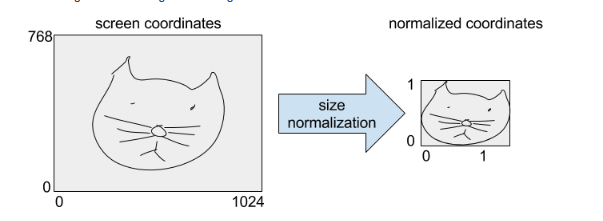

# Normalize, Center, and Standardize Image Pixels

The pixel values in images must be scaled prior to providing the images as input to a deep learning neural network model during the training or evaluation of the model.

## __numpy.reshape(a, newshape, order='C')__
    Parameters:
        - a : array_like
        - newshape : int or tuple of ints
        - order : {‘C’, ‘F’, ‘A’}, optional

    Returns:	
        - reshaped_array : ndarray

we need to reshape x_train  and test data

## __ndarray.astype(dtype)__

Copy of the array, cast to a specified type.

    Parameters:	
        - dtype : str or dtype

    Returns:	
        - arr_t : ndarray
        
we need to convert to dtype = float32

## normalize

can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

Scaling data to the range of 0-1 is traditionally referred to as normalization.

This can be achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range.

In this case, the ratio is 1/255


In [ ]:
# Reshape 
x_train = ## code here
x_test = ## code here

#  normalize
##code here to normalize x_train with 255.0
##code here to normalize X_test with 255.0


# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNN

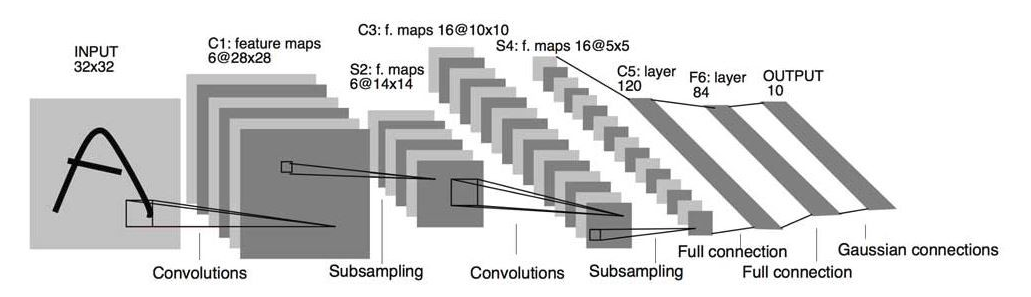



 - Convolutional layers in a convolutional neural network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input.

 - convolution layers are the major building blocks used in convolutional neural networks.

- Convolutional neural networks apply a filter to an input to create a feature map that summarizes the presence of detected features in the input.
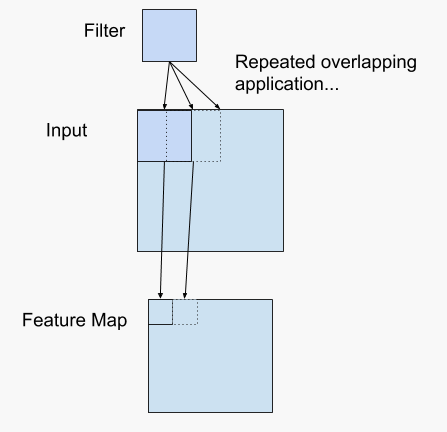


## _keras.layers.Conv2D(filters, kernel_size, padding='valid', input_shape=x_train.shape[1:], activation=None)_
### Arguments

__Filters__: 
    - Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    
    
__kernel_size__: 
    - An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

__Input shape__:
    - Used in layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the batch axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures.

__padding__:
    - one of "valid" or "same" (case-insensitive).

__Activation__:
    - Activation introduce non-linear properties to our Network. we will use Rectified Linear units i.e. 'relu'


## Max-Pooling
- Max pooling is used to reduce the image size by mapping the size of a given window into a single result by taking the maximum value of the elements in the window.

## _keras.layers.MaxPooling2D(pool_size=(2,2))_

### Argument
 __pool_size__:
 - integer or tuple of 2 integers,
 
## Flatten
- keras.layers.Flatten(data_format=None)
Flattens the input. Does not affect the batch size.
Arguments

data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs.

## Dense
## _keras.layers.Dense(units, activation=None)_

### Arguments

__units__: 
- Positive integer, dimensionality of the output space.
__activation__: 
- Activation function

## Table
__convNet configuration__: 
- the depth of the configuration increases from left (A) to the right(E), as more layres are added.
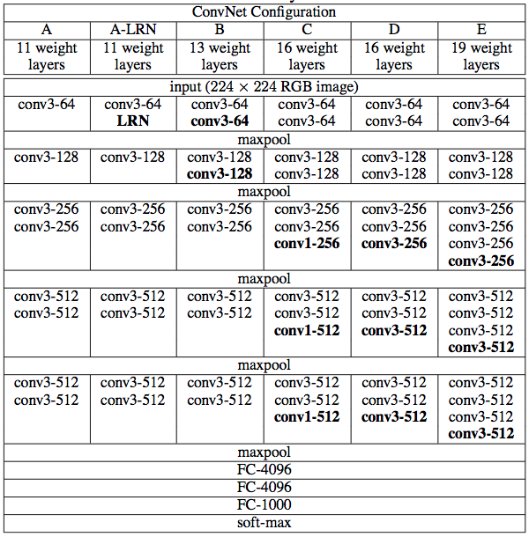

__Example__ 
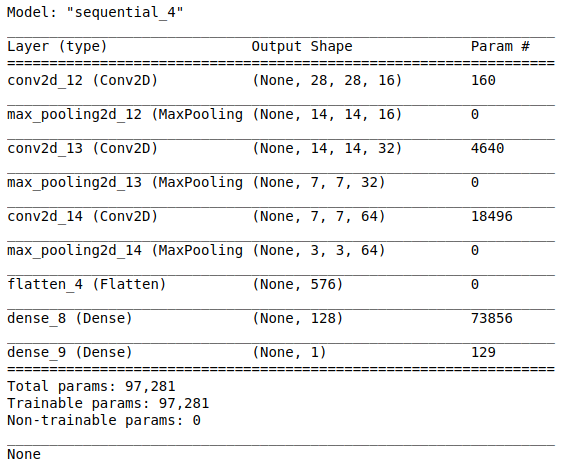

## Compilation
## _compile(loss=None,optimizer=adam,  metrics=None)_
### Arguments

__optimizer__:
String (name of optimizer) or optimizer instance. we use adam.
__loss__:
String (name of objective function) or objective function or  Loss instance. loss ="categorical_crossentropy"
__metrics__:
 - List of metrics to be evaluated by the model during training and testing. Typically you will use metrics=["top_k_categorical_accuracy"]


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf


def create_model_architecture():
    # Define model
    
    
    return model

model = create_model_architecture()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

In [ ]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

In [ ]:
import matplotlib.pyplot as plt
from random import randint
# %matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)